## Overview

We make sequence logo plots using filtered, averaged differential selection values

We add three overlays: (1) wildtype sequence (2) site type (i.e. *N*-glycosylation sequons, disulfides, and salt bridges), and (3) region (variable regions of gp120, conserved of gp120, and gp41)

Prior to generating sequence logo plots, the differential selection files were manually renumbered using [HXB2 numbering](http://people.biology.ucsd.edu/satish/Science/MePapers/korber.pdf). The renumbered diffsel files are used as the input files.


To adjust the logo plots for the best visual clarity, we made the following adjustments to the source codes

<pre>/Users/sam/.local/lib/python3.7/site-packages/weblogolib/__init__.py

* self.logo_margin = 2
* self.stroke_width = 0.5
* self.tic_length = 8
* self.stack_width = std_sizes["medium"]
* self.stack_aspect_ratio = 3
* self.stack_margin = 0.5
* self.pad_right = False
* self.small_fontsize = 6
* self.fontsize = 20
* self.title_fontsize = 20
* self.number_fontsize = 5

/Users/sam/.local/lib/python3.7/site-packages/phydmslib/weblogo.py

* relativestackheight = 1.5
* separatorheight = 0.01
* stackwidth = 5
    *** a stack width any greater will cause letters bleeding over to neighboring sites
* stackaspectratio = 1

in jupyter make the following adjustments:

* --nperline 120 \
* --letterheight 8 \
* --diffselrange -9 9 \  (this may differ on the dataset being used)


### Import modules and define general variables

In [1]:
import os
from IPython.display import display, HTML
import dms_tools2
import dms_tools2.plot
import dms_tools2.sra
import dms_tools2.utils
import dms_tools2.diffsel
import phydmslib.weblogo
from dms_tools2.ipython_utils import showPDF
import matplotlib

print("Using dms_tools2 version {0}".format(dms_tools2.__version__))

# number of CPUs to use; use all available
ncpus = -1
# use existing results if they exist
use_existing = 'yes'

Using dms_tools2 version 2.4.10


### Define input and output directories

In [2]:
diffseldir = './FilteredDiffsel'
overlaydir = './overlays'
logodir = './sequencelogo'
if not os.path.isdir(logodir):
    os.mkdir(logodir)

### Generate logo plots for filtered, averaged diffsel data

In [3]:
for proteostasis in ['XBP1s', 'ATF6', 'XBP1sATF6']:
    mutdiffsel = os.path.join(diffseldir, proteostasis + '_diffsel.csv')
    logoplot = os.path.join(diffseldir, '{0}_diffsel.pdf'.format(proteostasis))
    wtoverlayfile = os.path.join(overlaydir, proteostasis + '_wildtypeoverlay.csv')
    regionfile = os.path.join(overlaydir, proteostasis + '_regionoverlay.csv')
    sitetypefile = os.path.join(overlaydir, proteostasis + '_sitetypeoverlay.csv')
    print("\nCreating logo plot for {0} from {1}".format(proteostasis, mutdiffsel))
    log = !dms2_logoplot \
            --diffsel {mutdiffsel} \
            --name {proteostasis} \
            --outdir {logodir} \
            --overlay1 {wtoverlayfile} wildtype wildtype \
            --overlay2 {regionfile} R "Region" \
            --overlay3 {sitetypefile} F "Function" \
            --nperline 113 \
            --letterheight 8 \
            --diffselrange -9 9 \
            --underlay yes \
            --overlaycolormap rainbow \
            --ignore_extracols yes \
            --use_existing yes \
    
print("\nCompleted dms2_batch_seqlogo.")


Creating logo plot for XBP1s from ./FilteredDiffsel/XBP1s_diffsel.csv

Creating logo plot for ATF6 from ./FilteredDiffsel/ATF6_diffsel.csv

Creating logo plot for XBP1sATF6 from ./FilteredDiffsel/XBP1sATF6_diffsel.csv

Completed dms2_batch_seqlogo.


### +XBP1s vs. Basal

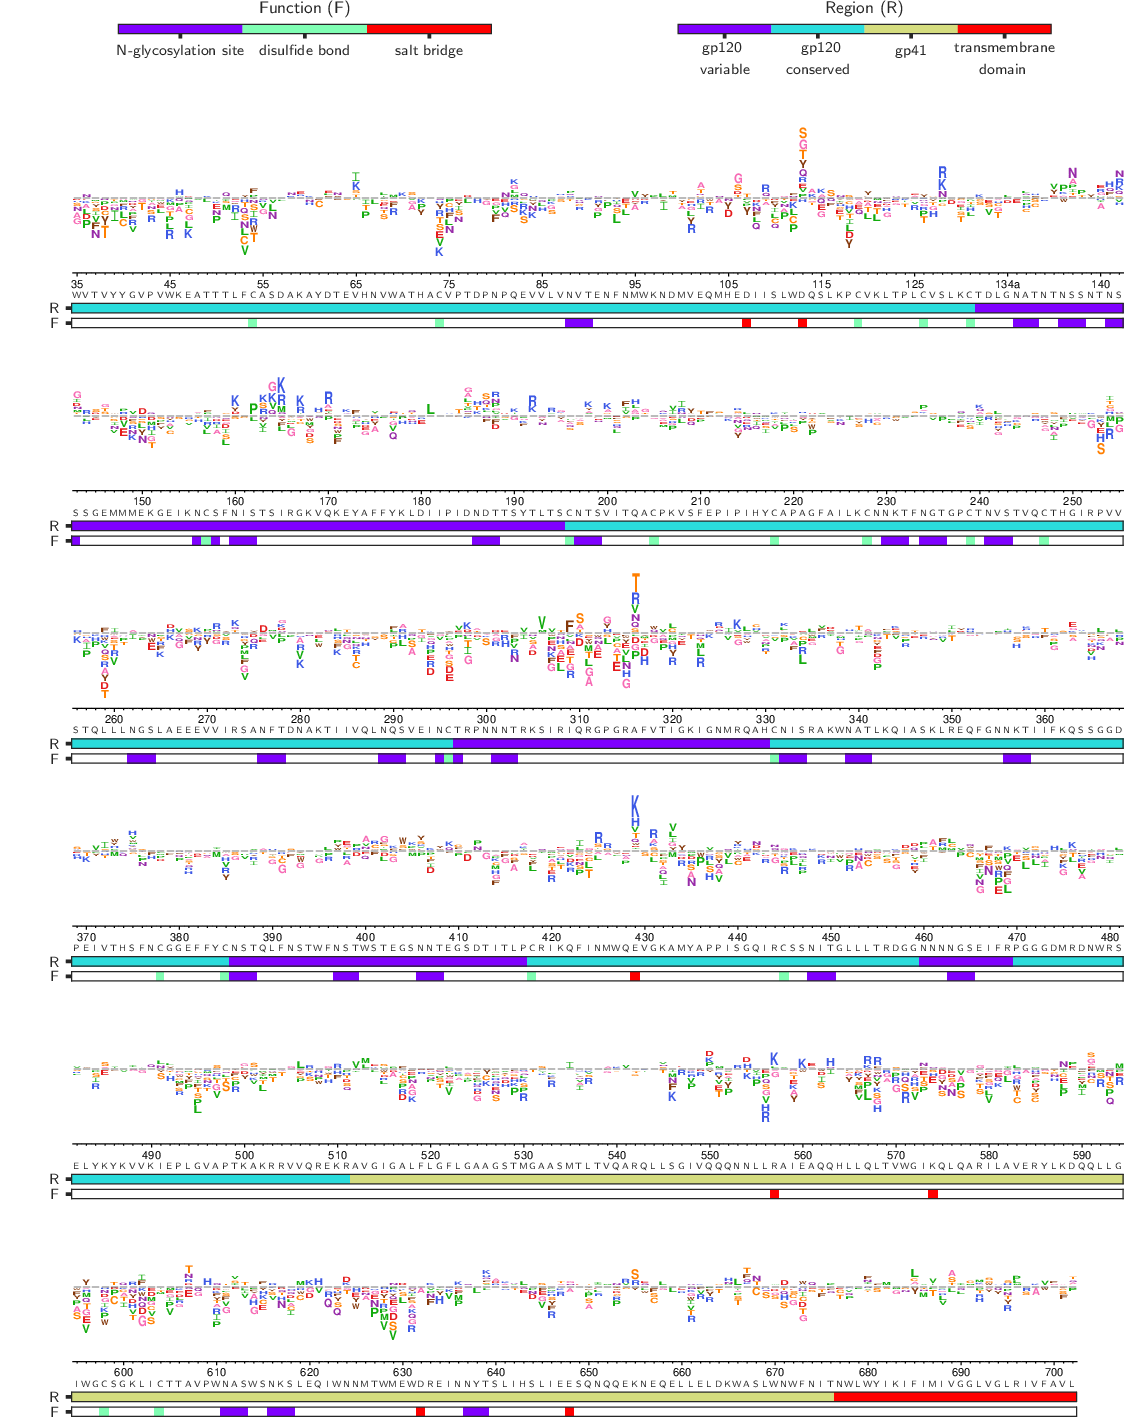

In [4]:
showPDF(logodir + '/XBP1s_diffsel.pdf')

### +ATF6 vs. Basal

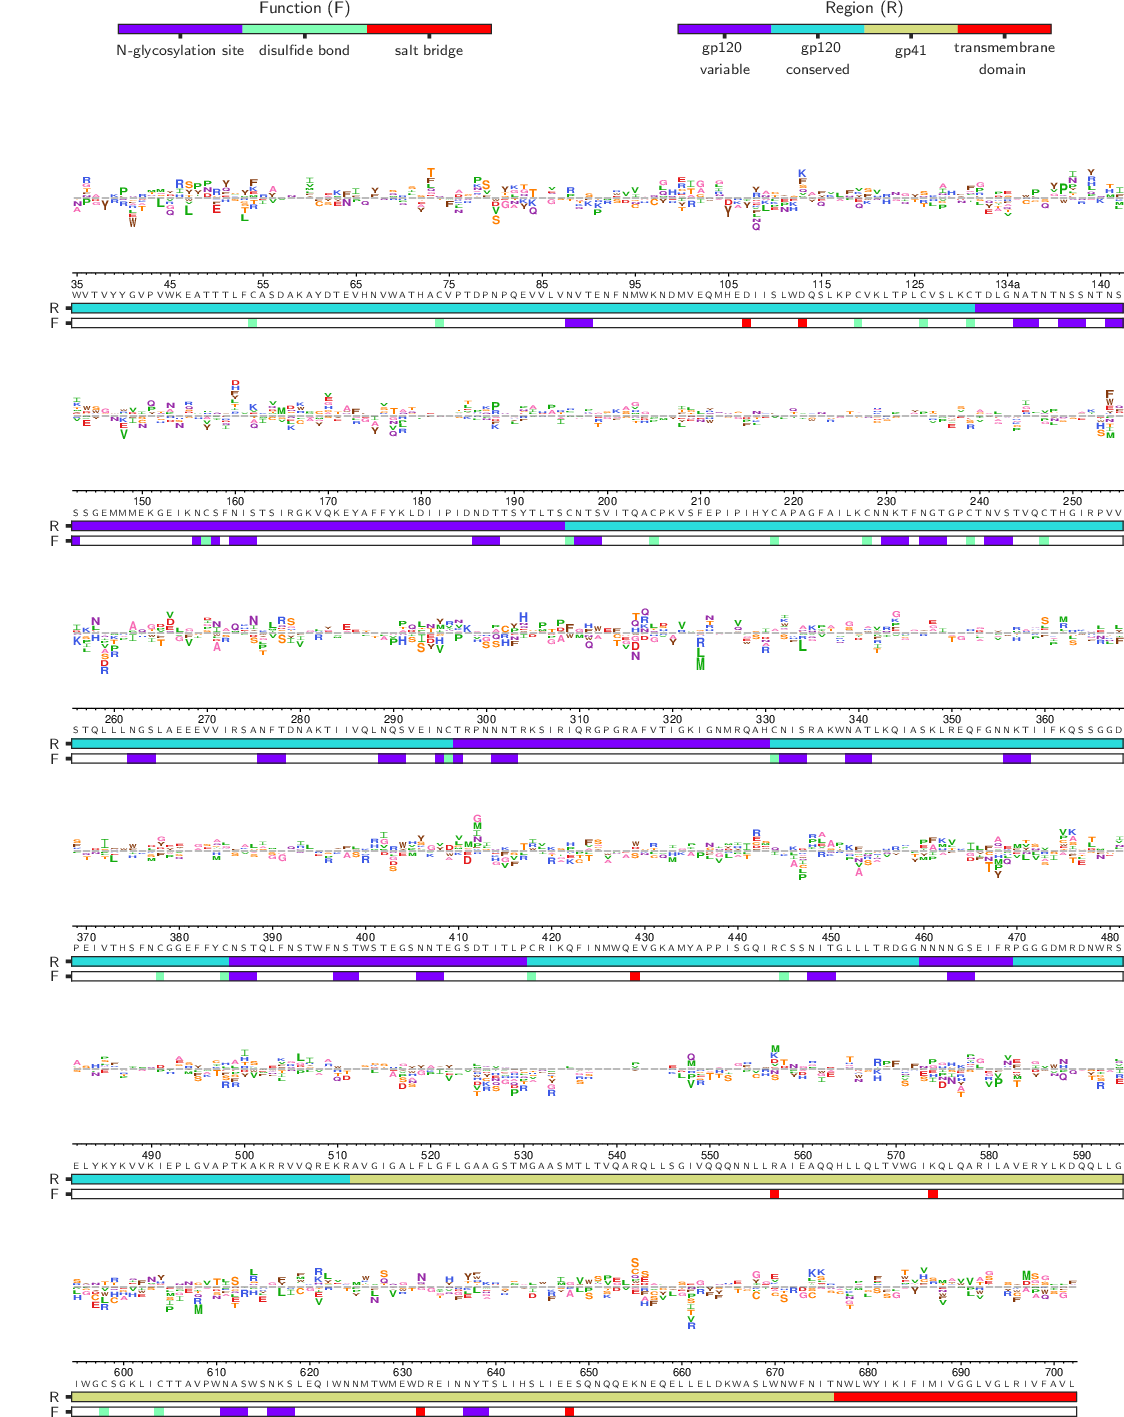

In [5]:
showPDF(logodir + '/ATF6_diffsel.pdf')

### +XBP1s/+ATF6 vs. Basal

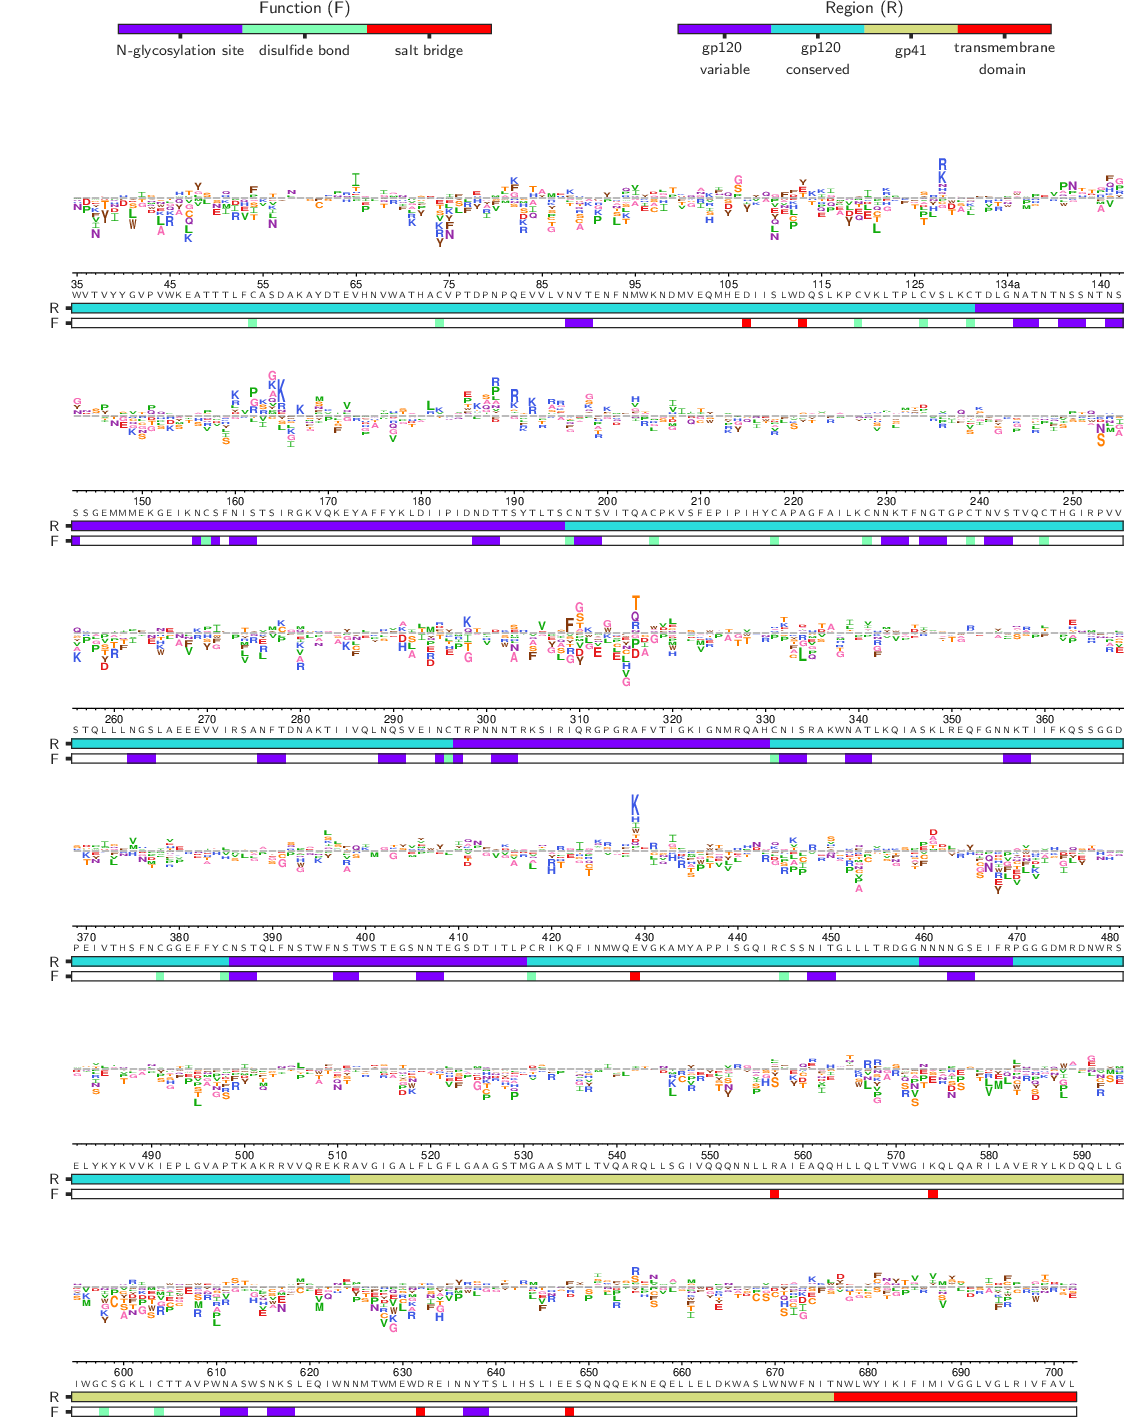

In [6]:
showPDF(logodir + '/XBP1sATF6_diffsel.pdf')